In [53]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [54]:
filename = 'iris.data.csv'
names = ['separ-legth','separ-width','petal-length','petal-width','class']
dataset = read_csv(filename, names = names)
print(dataset.shape)
print(dataset.head(10))
print(dataset.describe())

(150, 5)
   separ-legth  separ-width  petal-length  petal-width        class
0          5.1          3.5           1.4          0.2  Iris-setosa
1          4.9          3.0           1.4          0.2  Iris-setosa
2          4.7          3.2           1.3          0.2  Iris-setosa
3          4.6          3.1           1.5          0.2  Iris-setosa
4          5.0          3.6           1.4          0.2  Iris-setosa
5          5.4          3.9           1.7          0.4  Iris-setosa
6          4.6          3.4           1.4          0.3  Iris-setosa
7          5.0          3.4           1.5          0.2  Iris-setosa
8          4.4          2.9           1.4          0.2  Iris-setosa
9          4.9          3.1           1.5          0.1  Iris-setosa
       separ-legth  separ-width  petal-length  petal-width
count   150.000000   150.000000    150.000000   150.000000
mean      5.843333     3.054000      3.758667     1.198667
std       0.828066     0.433594      1.764420     0.763161
min    

**2)groupby**数据分类分布情况，执行程序后，得到的将是每个分类数据量的绝对的数值，可以看数据分布是否均衡。可以知道数据有三个亚种，而且分布均匀，所以比较精准。所以当数据不均衡的时候，需要进行处理，从而让数据处于均衡状态。  
**3）method for balancing data**, enlarge sample data, sample data again, generate some human-made data, testing the exception and variation.  

In [55]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# 3.4) data visualization 

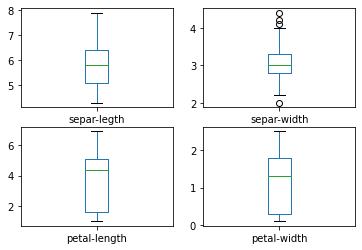

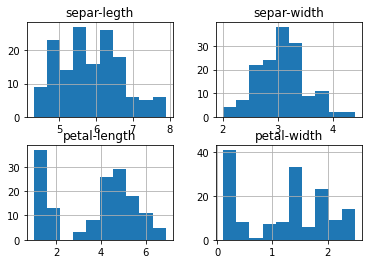

In [56]:
dataset.plot(kind ='box', subplots = True, layout =(2,2), sharex = False, sharey = False)
pyplot.show()
dataset.hist()
pyplot.show()

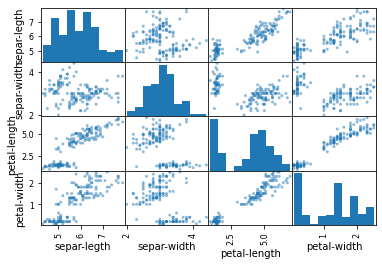

In [57]:
scatter_matrix(dataset)
pyplot.show()

# 3.5) algorithm evaluation

**what should we do for the data?**  
**1)extract evaluation dataset**

In [58]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = \
train_test_split(X, Y, test_size = validation_size, random_state = seed)

**2)use 10-folder cross-validation to evaluate the model**

**3)get 6 models to evaluate the new data** 

LR（linear algorithm),LDA(linear algorithm)---linear algorithm  
KNN(k near neighbors),CART(分类与回归树),NB（贝叶斯分类器）,SVM（支持向量机）---nonlinear algorithm  

In [59]:
models ={}
models['LR'] = LogisticRegression()
models['LDA']= LinearDiscriminantAnalysis()
models['KNN']= KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()

In [60]:
results = []
for key in models:
    kfold = KFold(n_splits =10)
    cv_results = cross_val_score(models[key],X_train,Y_train,cv = kfold, scoring ='accuracy')
    results.append(cv_results)
    print('%s: %f (%f)' % (key, cv_results.mean(), cv_results.std()))

/Users/wangjiabin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/wangjiabin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.983333 (0.033333)


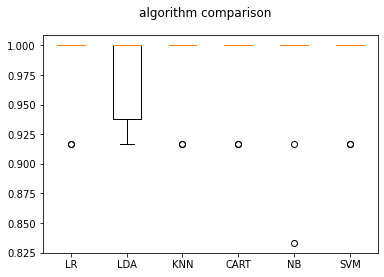

In [61]:
fig = pyplot.figure()
fig.suptitle('algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(models.keys())
pyplot.show()

# 3.6）Prediction

In [62]:
svm = SVC()
svm.fit(X =X_train, y = Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30

